<a href="https://colab.research.google.com/github/Derevenitckaia/ML_itmo_course/blob/main/task_7_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
import os


В данной **задаче** вам предстоит решить задачу **классификации изображений** – отделить изображения кошек от изображений собак, используя классификацию с мягким зазором и параметром . 

В предложенном архиве находится выборка, включающая в себя изображения кошек и собак (по 500 изображений). Имя каждого изображения, для удобства, имеет следующий формат:  cat/dog.номер_изображения.jpg  в зависимости от того, какое животное присутствует на изображении. Данная выборка используется для обучения классификатора и оценки классификатора.

Следующая выборка предназначена для классификации новых объектов после построения классификатора.

In [34]:
!git clone https://github.com/Derevenitckaia/ML_itmo_course

fatal: destination path 'ML_itmo_course' already exists and is not an empty directory.


Для работы с изображениями и получения их гистограмм — характеристик распределения интенсивности изображения, следует воспользоваться следующей функцией и библиотекой cv2:

In [17]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv.normalize(hist, hist)
    return hist.flatten()

При считывании набора данных (картинок) из папки для построения гистограммы отсортируйте названия по алфавиту, например, так (иначе тренировочные наборы данных могут отличаться даже при фиксированном random_seed):

In [18]:
path_train = '/content/ML_itmo_course/7. SVM/train'
imagePaths = sorted(list(os.listdir(path_train)))

flat_data_arr=[] 
target_arr=[]

for file in imagePaths:
  img = cv.imread(os.path.join(path_train , file ))
  hist = extract_histogram(img)
  flat_data_arr.append(hist)
  if 'cat' in file:
    target_arr.append(0)
  else:
    target_arr.append(1)


In [37]:
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)
df = pd.DataFrame(flat_data) #dataframe
df['Target'] = target
X = df.iloc[:,:-1] #input data 
Y = df.iloc[:,-1] #output data


# Задание

Обучите классификатор LinearSVC() при C = 0.94 и random_state = 2 на предложенной выборке. Используйте параметр random_state = 2 для разделения выборки на тренировочную и тестовую части, в отношении 75/25 функции train_test_split().

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=2)

model_svc = LinearSVC(C = 0.94, random_state = 2)
model_svc.fit(X_train, y_train)


LinearSVC(C=0.94, random_state=2)

In [36]:
print(model_svc.coef_[0,281], model_svc.coef_[0,130], model_svc.coef_[0,441])

0.09277315951800084 -0.007902970397376266 -0.00019623918013086797
[-0.16762029]


In [22]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, model_svc.predict(X_test))

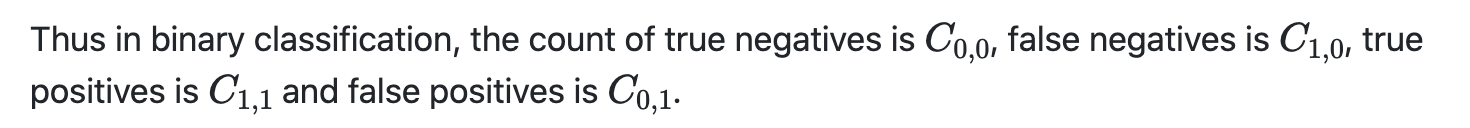

In [41]:
print(conf)
prec = conf[1,1]/(conf[0,1] + conf[1,1])
rec = conf[1,1]/(conf[1,0] + conf[1,1])
print("recall_score = ",rec, "precision_score = ", prec)
F1 = 2 * ((prec * rec) / (prec + rec))
print(F1)

[[87 34]
 [67 62]]
recall_score =  0.4806201550387597 precision_score =  0.6458333333333334
0.5511111111111111


In [42]:
from sklearn.metrics import recall_score, precision_score
print("recall_score = ", recall_score(y_test, model_svc.predict(X_test)))
print("precision_score = ", precision_score(y_test, model_svc.predict(X_test)))

recall_score =  0.4806201550387597
precision_score =  0.6458333333333334


In [43]:
from sklearn.metrics import fbeta_score
fbeta_score(y_test, model_svc.predict(X_test), beta = 1, average = 'macro')

0.591919191919192

#Задание 2
Выполните предсказание для изображений, указанных ниже. Введите назначенный класс: 0 или 1.

In [52]:
path_train = '/content/ML_itmo_course/7. SVM/test'
img_set = ['cat.1016.jpg',  'cat.1024.jpg', 'dog.1006.jpg', 'dog.1033.jpg']
# imagePaths = [path_train + img_name for img_name in img_set]

flat_data_arr=[] 
target_arr=[]

for file in img_set:
  img = cv.imread(os.path.join(path_train , file ))
  hist = extract_histogram(img)
  flat_data_arr.append(hist)
  if 'cat' in file:
    target_arr.append(0)
  else:
    target_arr.append(1)

flat_data = np.array(flat_data_arr)
target = np.array(target_arr)
df = pd.DataFrame(flat_data) #dataframe
df['Target'] = target
X = df.iloc[:,:-1] #input data 
Y = df.iloc[:,-1] #output data
df['Decision'] = model_svc.predict(X)
for i in range(len(img_set)):
  print(img_set[i], df['Target'][i], df['Decision'][i])



cat.1016.jpg 0 0
cat.1024.jpg 0 1
dog.1006.jpg 1 1
dog.1033.jpg 1 0


In [56]:
%cd /content/ML_itmo_course/7. SVM

/content/ML_itmo_course/7. SVM


In [57]:
!git add .

In [59]:
!git config --global user.email "derevenitckaia.ad@gmail.com"

In [62]:
!git config --global user.name "Derevenitckaia"

In [64]:
!git checkout master

error: pathspec 'master' did not match any file(s) known to git.
